**K-Means Clustering**

Clustering is the process of organizing objects into groups whose members are similar in some way. K-means clustering is one of the most popular and simple clustering algorithms. The purpose of K-means is to group observational data points into different subgroups. One of the main applications of K means clustering is customer segmentation with the aim of increasing company revenue. 




**Study Case of Clustering**

Customer segmentation is the division of a market into separate customer groups that have the same characteristics. Customer Segmentation can be a powerful tool for identifying unsatisfied customer needs. Using the data above, companies can outperform the competition by developing unique and attractive products and services. 

The data consists of seven columns (features), namely:

Nama Pelanggan: The name of the customer in text format of course

Jenis Kelamin: The gender of the customer, there are only two data content categories, namely Male and Female

Umur: Age of the customer in numeric format

Profesi: The profession of the customer, also in the type of category text consisting of Entrepreneurs, Students, Professionals, Housewives, and Students

Tipe Residen: The type of residence of our customers, for this dataset there are only two categories: Cluster dan Sector

NilaiBelanjaSetahun: Is the average value of spending per year per customer

1. Import Library for Clustering

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler

2. Read dataset (Customer Segmentation)

In [ ]:
df = pd.read_csv('customer_segmentation.csv')

In [ ]:
df.head()

,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun
0,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927
1,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700
2,Agus Cahyono,Pria,48,Professional,Cluster,5286429
3,Antonius Winarta,Pria,53,Professional,Cluster,5204498
4,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206


In [ ]:
df.describe()

,Umur,NilaiBelanjaSetahun
count,50.000000,5.000000e+01
mean,37.500000,7.069875e+06
std,14.673661,2.590619e+06
min,14.000000,2.722700e+06
25%,25.000000,5.257530e+06
50%,35.000000,5.980077e+06
75%,49.750000,9.739615e+06
max,64.000000,1.088451e+07


In [ ]:
df.isnull().sum()

Nama Pelanggan         0
Jenis Kelamin          0
Umur                   0
Profesi                0
Tipe Residen           0
NilaiBelanjaSetahun    0
dtype: int64

3. Exploratory Data Analysis (EDA)

In [ ]:
age18_25 = df.Umur[(df.Umur <= 25) & (df.Umur >= 12)]
age26_35 = df.Umur[(df.Umur <= 35) & (df.Umur >= 26)]
age36_45 = df.Umur[(df.Umur <= 45) & (df.Umur >= 36)]
age46_55 = df.Umur[(df.Umur <= 55) & (df.Umur >= 46)]
age55above = df.Umur[df.Umur >= 56]

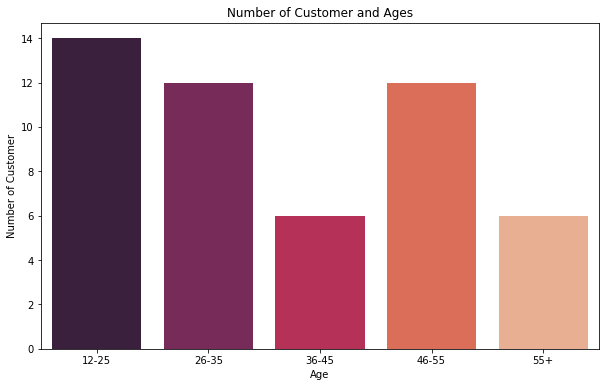

In [ ]:
x = ["12-25", "26-35","36-45","46-55", "55+"]
y = [len(age18_25.values), len(age26_35.values),
     len(age36_45.values), len(age46_55.values), len(age55above.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

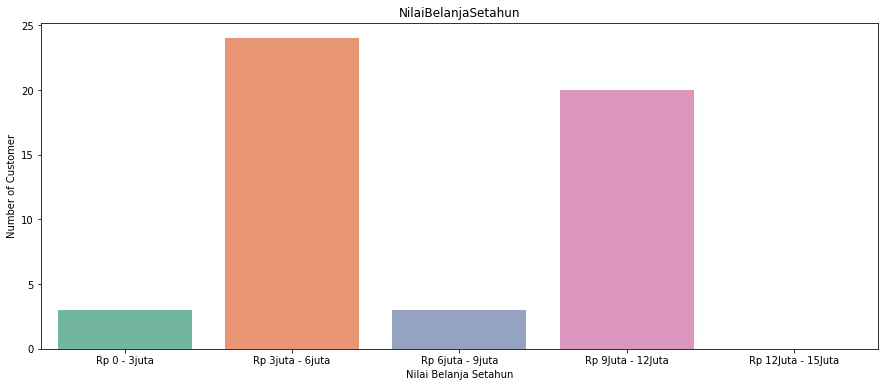

In [ ]:
ai0_30 = df["NilaiBelanjaSetahun"][(df["NilaiBelanjaSetahun"] >= 0) & (df["NilaiBelanjaSetahun"] <= 3000000)]
ai31_60 = df["NilaiBelanjaSetahun"][(df["NilaiBelanjaSetahun"] > 3000000) & (df["NilaiBelanjaSetahun"] <= 6000000)]
ai61_90 = df["NilaiBelanjaSetahun"][(df["NilaiBelanjaSetahun"] > 6000000) & (df["NilaiBelanjaSetahun"] <= 9000000)]
ai91_120 = df["NilaiBelanjaSetahun"][(df["NilaiBelanjaSetahun"] > 9000000) & (df["NilaiBelanjaSetahun"] <= 12000000)]
ai121_150 = df["NilaiBelanjaSetahun"][(df["NilaiBelanjaSetahun"] > 120000000) & (df["NilaiBelanjaSetahun"] <= 15000000)]

aix = ["Rp 0 - 3juta", "Rp 3juta - 6juta", "Rp 6juta - 9juta", "Rp 9Juta - 12Juta", "Rp 12Juta - 15Juta"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("NilaiBelanjaSetahun")
plt.xlabel("Nilai Belanja Setahun")
plt.ylabel("Number of Customer")
plt.show()

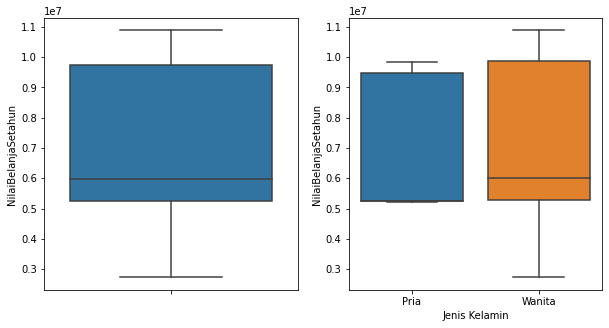

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.boxplot(y=df["NilaiBelanjaSetahun"])
plt.subplot(122)
sns.boxplot(x=df['Jenis Kelamin'], y=df["NilaiBelanjaSetahun"])

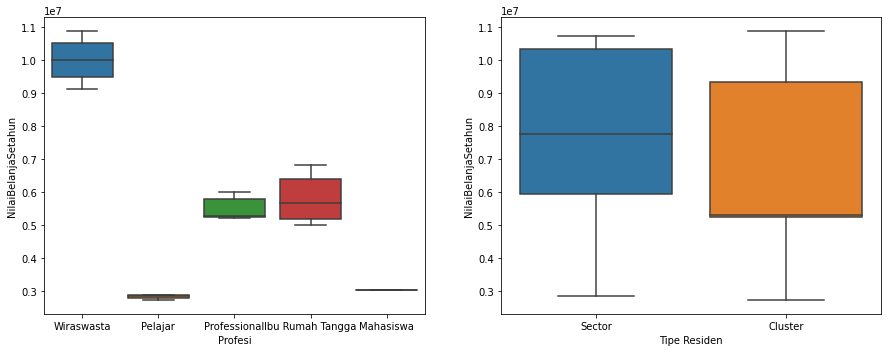

In [ ]:
plt.figure(figsize=(15,12))
plt.subplot(221)
sns.boxplot(x=df['Profesi'], y=df["NilaiBelanjaSetahun"])
plt.subplot(222)
sns.boxplot(x=df['Tipe Residen'], y=df["NilaiBelanjaSetahun"])

In [ ]:
categorical_variabel = df.select_dtypes('object')
cat_subset = categorical_variabel.drop(['Nama Pelanggan'], axis=1)
cat_subset.head()

,Jenis Kelamin,Profesi,Tipe Residen
0,Pria,Wiraswasta,Sector
1,Wanita,Pelajar,Cluster
2,Pria,Professional,Cluster
3,Pria,Professional,Cluster
4,Wanita,Wiraswasta,Cluster


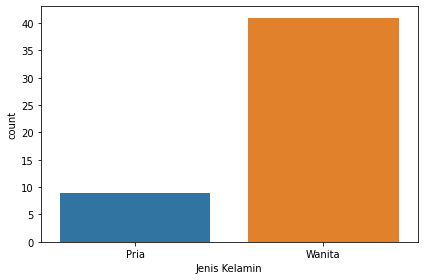

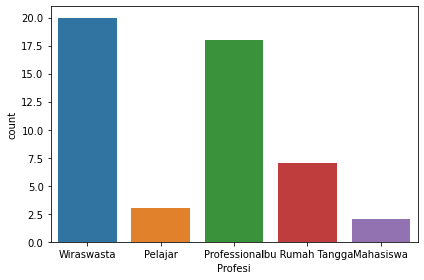

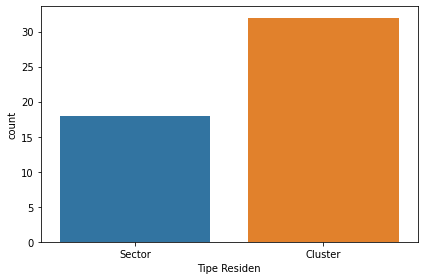

In [ ]:
for col in cat_subset:
  plt.figure()
  sns.countplot(x=col, data=df)
  plt.tight_layout()

4. Preprocessing

4.1 Encoding

In [ ]:
label_encoder = LabelEncoder()
encoded_data = df[cat_subset.columns].apply(label_encoder.fit_transform)

In [ ]:
encoded_data.head()

,Jenis Kelamin,Profesi,Tipe Residen
0,0,4,1
1,1,2,0
2,0,3,0
3,0,3,0
4,1,4,0


In [ ]:
cluster_data = pd.concat([encoded_data, df[["Umur", "NilaiBelanjaSetahun"]]], axis=1)

In [ ]:
scaler = StandardScaler()
cluster_data["NilaiBelanjaSetahun"] = scaler.fit_transform(cluster_data["NilaiBelanjaSetahun"].values.reshape(-1,1))

In [ ]:
cluster_data.head()

,Jenis Kelamin,Profesi,Tipe Residen,Umur,NilaiBelanjaSetahun
0,0,4,1,58,0.946763
1,1,2,0,14,-1.695081
2,0,3,0,48,-0.695414
3,0,3,0,53,-0.727361
4,1,4,0,41,1.382421


5. Create K-means Model

In [ ]:
cluster = KMeans(n_clusters=2)
cluster.fit(cluster_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
#create new column as cluster result (segment)
segment = pd.Series(cluster.labels_, name="segment")

In [ ]:
pd.concat([df, segment], axis=1).head()

,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,segment
0,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,1
1,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,0
2,Agus Cahyono,Pria,48,Professional,Cluster,5286429,1
3,Antonius Winarta,Pria,53,Professional,Cluster,5204498,1
4,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,1


5.1. Find K Optimum

In [ ]:
wcss = []
K = range(2,10)
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(cluster_data)
  wcss.append(km.inertia_)

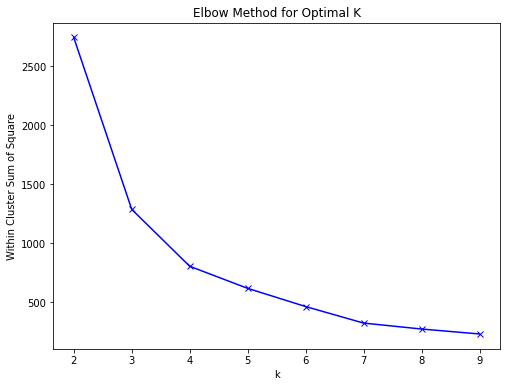

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(K, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('Within Cluster Sum of Square')
plt.title('Elbow Method for Optimal K')
plt.show()

Clustering with K Optimum

In [ ]:
cluster = KMeans(n_clusters=3)
cluster.fit(cluster_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
Exploration for Segmentation Customer Rresult

In [ ]:
segment = pd.Series(cluster.labels_, name="segment")

In [ ]:
results = pd.concat([df, segment], axis=1)

In [ ]:
results[results["segment"]==0]

,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,segment
0,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,0
2,Agus Cahyono,Pria,48,Professional,Cluster,5286429,0
3,Antonius Winarta,Pria,53,Professional,Cluster,5204498,0
6,"Cahyono, Agus",Pria,64,Wiraswasta,Sector,9837260,0
7,Danang Santosa,Pria,52,Professional,Cluster,5223569,0
10,Maria Suryawan,Wanita,50,Professional,Sector,5987367,0
11,Erliana Widjaja,Wanita,49,Professional,Sector,5941914,0
12,Cahaya Putri,Wanita,64,Wiraswasta,Cluster,9333168,0
13,Mario Setiawan,Pria,60,Wiraswasta,Cluster,9471615,0
17,Nelly Halim,Wanita,63,Ibu Rumah Tangga,Cluster,5340690,0


In [ ]:
results[results["segment"]==1]

,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,segment
4,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,1
8,Elisabeth Suryadinata,Wanita,29,Professional,Sector,5993218,1
9,Mario Setiawan,Pria,33,Professional,Cluster,5257448,1
15,Bambang Rudi,Pria,35,Professional,Cluster,5262521,1
16,Yuni Sari,Wanita,32,Ibu Rumah Tangga,Cluster,5677762,1
18,Mega Pranoto,Wanita,32,Wiraswasta,Cluster,10884508,1
20,Lestari Fabianto,Wanita,38,Wiraswasta,Cluster,9222070,1
22,Denny Amiruddin,Pria,34,Professional,Cluster,5239290,1
23,Putri Ginting,Wanita,39,Wiraswasta,Cluster,10259572,1
24,Julia Setiawan,Wanita,29,Wiraswasta,Sector,10721998,1


In [ ]:
results[results["segment"]==2]

,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,segment
1,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,2
5,Rosalina Kurnia,Wanita,24,Professional,Cluster,5215541,2
14,Shirley Ratuwati,Wanita,20,Wiraswasta,Cluster,10365668,2
19,Irene Novianto,Wanita,16,Pelajar,Sector,2896845,2
30,Eviana Handry,Wanita,19,Mahasiswa,Cluster,3042773,2
32,Cecilia Kusnadi,Wanita,19,Mahasiswa,Cluster,3047926,2
33,Deasy Arisandi,Wanita,21,Wiraswasta,Sector,9759822,2
36,Felicia Tandiono,Wanita,25,Professional,Sector,5972787,2
38,Gina Hidayat,Wanita,20,Professional,Cluster,5257775,2
39,Irene Darmawan,Wanita,14,Pelajar,Sector,2861855,2


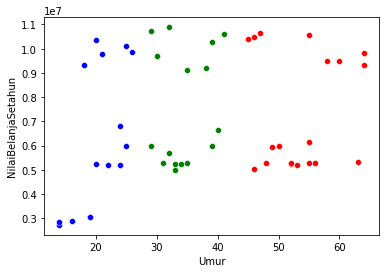

In [ ]:
sns.scatterplot(x=results[results["segment"]==0].Umur, y=results[results["segment"]==0].NilaiBelanjaSetahun, color="red")
sns.scatterplot(x=results[results["segment"]==1].Umur, y=results[results["segment"]==1].NilaiBelanjaSetahun, color="green")
sns.scatterplot(x=results[results["segment"]==2].Umur, y=results[results["segment"]==2].NilaiBelanjaSetahun, color="blue")